## 라이브러리 import

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

스케일러 라이브러리

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [5]:
#설정값 불러오기
inputdataRaw = pd.read_excel('./VS&VMS_27case_PRESM.xlsx')
inputdataRaw

,Mold Temperature,Melt Temperature,Packing Pressure,VS,VMS,VS(min),VS(max)
0,30,195,50,0.2021,0.002430,0.4713,0.6734
1,30,195,70,0.2044,0.003249,0.4681,0.6725
2,30,195,90,0.2040,0.004261,0.4670,0.6710
3,30,210,50,0.2122,0.002418,0.4744,0.6866
4,30,210,70,0.2147,0.002738,0.4696,0.6843
5,30,210,90,0.2172,0.003034,0.4653,0.6825
6,30,225,50,0.2275,0.002377,0.4741,0.7016
7,30,225,70,0.2295,0.002443,0.4707,0.7002
8,30,225,90,0.2297,0.002480,0.4695,0.6992
9,40,195,50,0.1900,0.002432,1.1680,1.3580


In [6]:
# scaler = MinMaxScaler()
# scaler.fit(inputdataRaw)
# inputdata = pd.DataFrame(scaler.transform(inputdataRaw))

In [7]:
# inputdata2_Raw = pd.read_excel('./VS&VMS_20case.xlsx')
# inputdata2_Raw

# training, label 분리

In [8]:
inputdata = inputdataRaw.iloc[:,:-4]
scaler = MinMaxScaler()
scaler.fit(inputdata)
TrainData = pd.DataFrame(scaler.transform(inputdata))
TrainLabel = pd.DataFrame(inputdataRaw.iloc[:,3]) # VS 예측
# TrainLabel = pd.DataFrame(inputdataRaw.iloc[:,4]) # VMS 예측

In [9]:
TrainData

,0,1,2
0,0.0,0.0,0.0
1,0.0,0.0,0.5
2,0.0,0.0,1.0
3,0.0,0.5,0.0
4,0.0,0.5,0.5
5,0.0,0.5,1.0
6,0.0,1.0,0.0
7,0.0,1.0,0.5
8,0.0,1.0,1.0
9,0.5,0.0,0.0


In [10]:
TrainLabel

,VS
0,0.2021
1,0.2044
2,0.2040
3,0.2122
4,0.2147
5,0.2172
6,0.2275
7,0.2295
8,0.2297
9,0.1900


In [11]:
# pd.set_option('display.max_rows',10)
# TrainData

In [12]:
# TrainLabel_before

In [13]:
# TrainLabel = TrainLabel_before.add(0.5)
# TrainLabel

In [14]:
TestData_Raw = inputdataRaw.iloc[:,:-4]
TestData_Raw

,Mold Temperature,Melt Temperature,Packing Pressure
0,30,195,50
1,30,195,70
2,30,195,90
3,30,210,50
4,30,210,70
5,30,210,90
6,30,225,50
7,30,225,70
8,30,225,90
9,40,195,50


In [15]:
min_MoldTemperature = inputdataRaw["Mold Temperature"].min()
max_MoldTemperature = inputdataRaw["Mold Temperature"].max()
min_MeltTemperature = inputdataRaw["Melt Temperature"].min()
max_MeltTemperature = inputdataRaw["Melt Temperature"].max()
min_PackingPressure = inputdataRaw["Packing Pressure"].min()
max_PackingPressure = inputdataRaw["Packing Pressure"].max()
min_VS = inputdataRaw["VS"].min()
max_VS = inputdataRaw["VS"].max()
min_VMS = inputdataRaw["VMS"].min()
max_VMS = inputdataRaw["VMS"].max()

print(min_MoldTemperature,
max_MoldTemperature,
min_MeltTemperature,
max_MeltTemperature,
min_PackingPressure,
max_PackingPressure,
min_VS,
max_VS,
min_VMS,
max_VMS)

30 50 195 225 50 90 0.18599999999999972 0.22970000000000007 0.002094 0.0051


In [16]:
pd.set_option('display.max_rows', None)
TestData_MoldTemperature = inputdataRaw.iloc[:,:1]
TestData_MoldTemperature2 = TestData_MoldTemperature.sub(min_MoldTemperature)
TestData_MoldTemperature3 = TestData_MoldTemperature2.div(max_MoldTemperature-min_MoldTemperature)
TestData_MoldTemperature3

,Mold Temperature
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.5


In [17]:
pd.set_option('display.max_rows', None)
TestData_MeltTemperature = inputdataRaw.iloc[:,1:2]
TestData_MeltTemperature2 = TestData_MeltTemperature.sub(min_MeltTemperature)
TestData_MeltTemperature3 = TestData_MeltTemperature2.div(max_MeltTemperature-min_MeltTemperature)
TestData_MeltTemperature3

,Melt Temperature
0,0.0
1,0.0
2,0.0
3,0.5
4,0.5
5,0.5
6,1.0
7,1.0
8,1.0
9,0.0


In [18]:
TestData_PackingPressure = inputdataRaw.iloc[:,2:3]
TestData_PackingPressure2 = TestData_PackingPressure.sub(min_PackingPressure)
TestData_PackingPressure3 = TestData_PackingPressure2.div(max_PackingPressure-min_PackingPressure)
TestData_PackingPressure3

,Packing Pressure
0,0.0
1,0.5
2,1.0
3,0.0
4,0.5
5,1.0
6,0.0
7,0.5
8,1.0
9,0.0


In [19]:
TestData = pd.concat([TestData_MoldTemperature3, TestData_MeltTemperature3, TestData_PackingPressure3], axis=1)
TestData

,Mold Temperature,Melt Temperature,Packing Pressure
0,0.0,0.0,0.0
1,0.0,0.0,0.5
2,0.0,0.0,1.0
3,0.0,0.5,0.0
4,0.0,0.5,0.5
5,0.0,0.5,1.0
6,0.0,1.0,0.0
7,0.0,1.0,0.5
8,0.0,1.0,1.0
9,0.5,0.0,0.0


In [20]:
TestLabel = pd.DataFrame(inputdataRaw.iloc[:,3])
TestLabel

,VS
0,0.2021
1,0.2044
2,0.2040
3,0.2122
4,0.2147
5,0.2172
6,0.2275
7,0.2295
8,0.2297
9,0.1900


## ANN hyperparameter 조절에 따른 학습성능 확인 

#### 지정 iteration마다 학습과정 확인 함수(Class) 정의

In [21]:
EpochForPrint = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%EpochForPrint == 0:
            print("[{} Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                  .format(epoch, np.sqrt(logs['mse']), logs['mae'], logs['mape']))

#### Hyperparameter 조합 설정

In [22]:
# 조정 하이퍼파라미터 : 학습율, 은닉층 뉴런 수
Lr = [0.001, 0.005, 0.01]   # Learning Rates
N1 = [60, 70, 80, 90, 100, 110, 120, 130]   # Number of Neurons on Hidden Layer 1
N2 = [50, 60, 70, 80, 90, 100, 110]           # Number of Neurons on Hidden Layer 2

Model = ['VS']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1
Epoch          = 2000

print('Number of case : %d'%(len(Lr)*len(N1)*len(N2)))

Number of case : 168


### 최적의 hyperparameter 결정

In [23]:
for M in range(1):
    
    Tr_result_temp = np.zeros((len(Lr)*len(N1)*len(N2) , 7)) # *len(N2)
    cnt = 0
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    print('\n\n\n\n################## Model %d (Predict :'%(M+1) + Model[M] + ') ##################')

    for i in range(len(Lr)):
        learningRate = Lr[i]

        for j in range(len(N1)):
            noOfNeuron1 = N1[j]
            
            for k in range(len(N2)):
                noOfNeuron2 = N2[k]

                print('\n\nTrial No.%d'%(cnt+1))
                print('Prediction :' + Model[M])
                print('Learning rate : {:.3}'.format(learningRate))
                print('Hidden 1 neuron : %d'%(noOfNeuron1))
                print('Hidden 2 neuron : %d'%(noOfNeuron2))

                ################ 신경망 구조 재설계 ################

                tf.keras.backend.clear_session()
                def ANN_model(input_data):
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(units = noOfNeuron_in,
                                                 input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
                    model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
                    model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
                    model.add(keras.layers.Dense(units = noOfNeuron_out,             )) # Output Layer
                    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                                  loss=keras.losses.mean_absolute_error,
                                  metrics=['mse','mae','mape'])
                    return model
                model = ANN_model(TrainData)

                ################ 신경망 학습 ################

                hist = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
                print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                      .format(np.sqrt(hist.history['mse'][-1]), hist.history['mae'][-1], hist.history['mape'][-1]))
                
                model.save('./27case_MLmodels_ANN_PRESM/Model_%d.h5'%(cnt+1))
                
                Tr_result_temp[cnt,0] = cnt+1
                Tr_result_temp[cnt,1] = learningRate
                Tr_result_temp[cnt,2] = noOfNeuron1
                Tr_result_temp[cnt,3] = noOfNeuron2
                Tr_result_temp[cnt,4] = np.sqrt(hist.history['mse'][-1])
                Tr_result_temp[cnt,5] = hist.history['mae'][-1]
                Tr_result_temp[cnt,6] = hist.history['mape'][-1]

                cnt=cnt+1


    Tr_result_temp_pd = pd.DataFrame(Tr_result_temp, columns=['Case', 'L.rate', 'Nr-HL1', 'Nr-HL2', 'RMSE', 'MAE', 'MAPE'])
    Tr_result_temp_pd.to_csv('./27case_MLmodels_ANN_PRESM/Tr_result_epoch%d.csv'%(Epoch), index=None)





################## Model 1 (Predict :VS) ##################


Trial No.1
Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 60
Hidden 2 neuron : 50
[0 Epochs]    RMSE:0.21593,   MAE: 0.21366,  MAPE: 101.88%
[100 Epochs]    RMSE:0.00226,   MAE: 0.00168,  MAPE: 0.80%
[200 Epochs]    RMSE:0.00105,   MAE: 0.00067,  MAPE: 0.33%
[300 Epochs]    RMSE:0.00539,   MAE: 0.00508,  MAPE: 2.41%
[400 Epochs]    RMSE:0.00205,   MAE: 0.00172,  MAPE: 0.82%
[500 Epochs]    RMSE:0.00129,   MAE: 0.00098,  MAPE: 0.48%
[600 Epochs]    RMSE:0.00197,   MAE: 0.00158,  MAPE: 0.73%
[700 Epochs]    RMSE:0.00540,   MAE: 0.00531,  MAPE: 2.54%
[800 Epochs]    RMSE:0.00140,   MAE: 0.00109,  MAPE: 0.51%
[900 Epochs]    RMSE:0.00115,   MAE: 0.00096,  MAPE: 0.47%
[1000 Epochs]    RMSE:0.00124,   MAE: 0.00101,  MAPE: 0.49%
[1100 Epochs]    RMSE:0.00172,   MAE: 0.00142,  MAPE: 0.70%
[1200 Epochs]    RMSE:0.00127,   MAE: 0.00111,  MAPE: 0.53%
[1300 Epochs]    RMSE:0.00063,   MAE: 0.00054,  MAPE: 0.25%
[1400 Epochs] 

[0 Epochs]    RMSE:0.27116,   MAE: 0.26808,  MAPE: 128.00%
[100 Epochs]    RMSE:0.00427,   MAE: 0.00358,  MAPE: 1.70%
[200 Epochs]    RMSE:0.00273,   MAE: 0.00223,  MAPE: 1.08%
[300 Epochs]    RMSE:0.00191,   MAE: 0.00178,  MAPE: 0.85%
[400 Epochs]    RMSE:0.00062,   MAE: 0.00053,  MAPE: 0.25%
[500 Epochs]    RMSE:0.00086,   MAE: 0.00060,  MAPE: 0.28%
[600 Epochs]    RMSE:0.00174,   MAE: 0.00151,  MAPE: 0.73%
[700 Epochs]    RMSE:0.00189,   MAE: 0.00155,  MAPE: 0.77%
[800 Epochs]    RMSE:0.00147,   MAE: 0.00123,  MAPE: 0.58%
[900 Epochs]    RMSE:0.00145,   MAE: 0.00108,  MAPE: 0.54%
[1000 Epochs]    RMSE:0.00252,   MAE: 0.00228,  MAPE: 1.08%
[1100 Epochs]    RMSE:0.00334,   MAE: 0.00311,  MAPE: 1.47%
[1200 Epochs]    RMSE:0.00131,   MAE: 0.00109,  MAPE: 0.52%
[1300 Epochs]    RMSE:0.00246,   MAE: 0.00216,  MAPE: 1.01%
[1400 Epochs]    RMSE:0.00143,   MAE: 0.00121,  MAPE: 0.57%
[1500 Epochs]    RMSE:0.00136,   MAE: 0.00113,  MAPE: 0.56%
[1600 Epochs]    RMSE:0.00112,   MAE: 0.00090,  MA

[300 Epochs]    RMSE:0.00479,   MAE: 0.00410,  MAPE: 1.96%
[400 Epochs]    RMSE:0.00222,   MAE: 0.00200,  MAPE: 0.95%
[500 Epochs]    RMSE:0.00391,   MAE: 0.00340,  MAPE: 1.64%
[600 Epochs]    RMSE:0.00528,   MAE: 0.00482,  MAPE: 2.29%
[700 Epochs]    RMSE:0.00407,   MAE: 0.00394,  MAPE: 1.87%
[800 Epochs]    RMSE:0.00182,   MAE: 0.00151,  MAPE: 0.73%
[900 Epochs]    RMSE:0.00332,   MAE: 0.00323,  MAPE: 1.56%
[1000 Epochs]    RMSE:0.00167,   MAE: 0.00150,  MAPE: 0.73%
[1100 Epochs]    RMSE:0.00232,   MAE: 0.00211,  MAPE: 0.99%
[1200 Epochs]    RMSE:0.00245,   MAE: 0.00201,  MAPE: 0.92%
[1300 Epochs]    RMSE:0.00203,   MAE: 0.00192,  MAPE: 0.92%
[1400 Epochs]    RMSE:0.00319,   MAE: 0.00306,  MAPE: 1.46%
[1500 Epochs]    RMSE:0.00072,   MAE: 0.00064,  MAPE: 0.31%
[1600 Epochs]    RMSE:0.00122,   MAE: 0.00103,  MAPE: 0.50%
[1700 Epochs]    RMSE:0.00117,   MAE: 0.00097,  MAPE: 0.47%
[1800 Epochs]    RMSE:0.00216,   MAE: 0.00197,  MAPE: 0.93%
[1900 Epochs]    RMSE:0.00191,   MAE: 0.00165, 

[600 Epochs]    RMSE:0.00148,   MAE: 0.00114,  MAPE: 0.55%
[700 Epochs]    RMSE:0.00101,   MAE: 0.00074,  MAPE: 0.36%
[800 Epochs]    RMSE:0.00090,   MAE: 0.00074,  MAPE: 0.37%
[900 Epochs]    RMSE:0.00074,   MAE: 0.00054,  MAPE: 0.26%
[1000 Epochs]    RMSE:0.00091,   MAE: 0.00075,  MAPE: 0.36%
[1100 Epochs]    RMSE:0.00130,   MAE: 0.00101,  MAPE: 0.50%
[1200 Epochs]    RMSE:0.00217,   MAE: 0.00198,  MAPE: 0.95%
[1300 Epochs]    RMSE:0.00148,   MAE: 0.00117,  MAPE: 0.55%
[1400 Epochs]    RMSE:0.00202,   MAE: 0.00181,  MAPE: 0.85%
[1500 Epochs]    RMSE:0.00095,   MAE: 0.00067,  MAPE: 0.32%
[1600 Epochs]    RMSE:0.00101,   MAE: 0.00086,  MAPE: 0.41%
[1700 Epochs]    RMSE:0.00076,   MAE: 0.00059,  MAPE: 0.29%
[1800 Epochs]    RMSE:0.00096,   MAE: 0.00074,  MAPE: 0.36%
[1900 Epochs]    RMSE:0.00087,   MAE: 0.00069,  MAPE: 0.33%

[Final Epochs]    RMSE:0.00148,   MAE: 0.00114,  MAPE: 0.55%


Trial No.20
Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 80
Hidden 2 neuron : 100
[0 Epoch

[1000 Epochs]    RMSE:0.00456,   MAE: 0.00428,  MAPE: 2.03%
[1100 Epochs]    RMSE:0.00391,   MAE: 0.00334,  MAPE: 1.58%
[1200 Epochs]    RMSE:0.00146,   MAE: 0.00124,  MAPE: 0.58%
[1300 Epochs]    RMSE:0.00137,   MAE: 0.00117,  MAPE: 0.56%
[1400 Epochs]    RMSE:0.00478,   MAE: 0.00446,  MAPE: 2.11%
[1500 Epochs]    RMSE:0.00474,   MAE: 0.00437,  MAPE: 2.06%
[1600 Epochs]    RMSE:0.00172,   MAE: 0.00143,  MAPE: 0.67%
[1700 Epochs]    RMSE:0.00534,   MAE: 0.00517,  MAPE: 2.46%
[1800 Epochs]    RMSE:0.00150,   MAE: 0.00121,  MAPE: 0.60%
[1900 Epochs]    RMSE:0.00213,   MAE: 0.00188,  MAPE: 0.91%

[Final Epochs]    RMSE:0.00395,   MAE: 0.00383,  MAPE: 1.83%


Trial No.26
Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 90
Hidden 2 neuron : 90
[0 Epochs]    RMSE:0.21709,   MAE: 0.21342,  MAPE: 102.10%
[100 Epochs]    RMSE:0.00275,   MAE: 0.00242,  MAPE: 1.16%
[200 Epochs]    RMSE:0.00167,   MAE: 0.00138,  MAPE: 0.67%
[300 Epochs]    RMSE:0.00243,   MAE: 0.00225,  MAPE: 1.08%
[400 Epoc

[1200 Epochs]    RMSE:0.00126,   MAE: 0.00115,  MAPE: 0.55%
[1300 Epochs]    RMSE:0.00245,   MAE: 0.00205,  MAPE: 1.01%
[1400 Epochs]    RMSE:0.00170,   MAE: 0.00145,  MAPE: 0.72%
[1500 Epochs]    RMSE:0.00141,   MAE: 0.00115,  MAPE: 0.54%
[1600 Epochs]    RMSE:0.00179,   MAE: 0.00164,  MAPE: 0.78%
[1700 Epochs]    RMSE:0.00169,   MAE: 0.00146,  MAPE: 0.72%
[1800 Epochs]    RMSE:0.00042,   MAE: 0.00032,  MAPE: 0.16%
[1900 Epochs]    RMSE:0.00211,   MAE: 0.00196,  MAPE: 0.93%

[Final Epochs]    RMSE:0.00049,   MAE: 0.00041,  MAPE: 0.20%


Trial No.32
Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 100
Hidden 2 neuron : 80
[0 Epochs]    RMSE:0.50249,   MAE: 0.47673,  MAPE: 227.55%
[100 Epochs]    RMSE:0.00473,   MAE: 0.00343,  MAPE: 1.62%
[200 Epochs]    RMSE:0.00215,   MAE: 0.00164,  MAPE: 0.78%
[300 Epochs]    RMSE:0.00247,   MAE: 0.00188,  MAPE: 0.90%
[400 Epochs]    RMSE:0.00193,   MAE: 0.00152,  MAPE: 0.71%
[500 Epochs]    RMSE:0.00185,   MAE: 0.00158,  MAPE: 0.75%
[600 Epoch

[1400 Epochs]    RMSE:0.00199,   MAE: 0.00164,  MAPE: 0.78%
[1500 Epochs]    RMSE:0.00177,   MAE: 0.00133,  MAPE: 0.65%
[1600 Epochs]    RMSE:0.00058,   MAE: 0.00048,  MAPE: 0.23%
[1700 Epochs]    RMSE:0.00146,   MAE: 0.00130,  MAPE: 0.62%
[1800 Epochs]    RMSE:0.00083,   MAE: 0.00063,  MAPE: 0.31%
[1900 Epochs]    RMSE:0.00122,   MAE: 0.00091,  MAPE: 0.43%

[Final Epochs]    RMSE:0.00118,   MAE: 0.00092,  MAPE: 0.42%


Trial No.38
Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 110
Hidden 2 neuron : 70
[0 Epochs]    RMSE:0.24967,   MAE: 0.24863,  MAPE: 118.79%
[100 Epochs]    RMSE:0.00283,   MAE: 0.00233,  MAPE: 1.11%
[200 Epochs]    RMSE:0.00255,   MAE: 0.00221,  MAPE: 1.06%
[300 Epochs]    RMSE:0.00224,   MAE: 0.00176,  MAPE: 0.81%
[400 Epochs]    RMSE:0.00154,   MAE: 0.00125,  MAPE: 0.58%
[500 Epochs]    RMSE:0.00258,   MAE: 0.00221,  MAPE: 1.04%
[600 Epochs]    RMSE:0.00141,   MAE: 0.00118,  MAPE: 0.56%
[700 Epochs]    RMSE:0.00290,   MAE: 0.00245,  MAPE: 1.17%
[800 Epochs]

[1600 Epochs]    RMSE:0.00130,   MAE: 0.00106,  MAPE: 0.51%
[1700 Epochs]    RMSE:0.00339,   MAE: 0.00324,  MAPE: 1.53%
[1800 Epochs]    RMSE:0.00102,   MAE: 0.00090,  MAPE: 0.43%
[1900 Epochs]    RMSE:0.00075,   MAE: 0.00058,  MAPE: 0.28%

[Final Epochs]    RMSE:0.00094,   MAE: 0.00071,  MAPE: 0.33%


Trial No.44
Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 120
Hidden 2 neuron : 60
[0 Epochs]    RMSE:0.26592,   MAE: 0.26326,  MAPE: 125.29%
[100 Epochs]    RMSE:0.00268,   MAE: 0.00215,  MAPE: 1.02%
[200 Epochs]    RMSE:0.00276,   MAE: 0.00246,  MAPE: 1.19%
[300 Epochs]    RMSE:0.00252,   MAE: 0.00231,  MAPE: 1.11%
[400 Epochs]    RMSE:0.00075,   MAE: 0.00063,  MAPE: 0.30%
[500 Epochs]    RMSE:0.00270,   MAE: 0.00228,  MAPE: 1.09%
[600 Epochs]    RMSE:0.00163,   MAE: 0.00147,  MAPE: 0.71%
[700 Epochs]    RMSE:0.00157,   MAE: 0.00122,  MAPE: 0.59%
[800 Epochs]    RMSE:0.00145,   MAE: 0.00115,  MAPE: 0.54%
[900 Epochs]    RMSE:0.00149,   MAE: 0.00103,  MAPE: 0.50%
[1000 Epochs] 

[1800 Epochs]    RMSE:0.00169,   MAE: 0.00167,  MAPE: 0.80%
[1900 Epochs]    RMSE:0.00085,   MAE: 0.00063,  MAPE: 0.30%

[Final Epochs]    RMSE:0.00068,   MAE: 0.00059,  MAPE: 0.28%


Trial No.50
Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 130
Hidden 2 neuron : 50
[0 Epochs]    RMSE:0.18738,   MAE: 0.18026,  MAPE: 87.29%
[100 Epochs]    RMSE:0.00473,   MAE: 0.00333,  MAPE: 1.56%
[200 Epochs]    RMSE:0.00285,   MAE: 0.00259,  MAPE: 1.25%
[300 Epochs]    RMSE:0.00386,   MAE: 0.00330,  MAPE: 1.55%
[400 Epochs]    RMSE:0.00224,   MAE: 0.00196,  MAPE: 0.92%
[500 Epochs]    RMSE:0.00180,   MAE: 0.00154,  MAPE: 0.73%
[600 Epochs]    RMSE:0.00199,   MAE: 0.00162,  MAPE: 0.76%
[700 Epochs]    RMSE:0.00152,   MAE: 0.00131,  MAPE: 0.62%
[800 Epochs]    RMSE:0.00233,   MAE: 0.00206,  MAPE: 0.98%
[900 Epochs]    RMSE:0.00281,   MAE: 0.00265,  MAPE: 1.29%
[1000 Epochs]    RMSE:0.00066,   MAE: 0.00052,  MAPE: 0.25%
[1100 Epochs]    RMSE:0.00195,   MAE: 0.00180,  MAPE: 0.87%
[1200 Epochs]  


[Final Epochs]    RMSE:0.00190,   MAE: 0.00177,  MAPE: 0.85%


Trial No.56
Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 130
Hidden 2 neuron : 110
[0 Epochs]    RMSE:0.28838,   MAE: 0.28075,  MAPE: 132.71%
[100 Epochs]    RMSE:0.00480,   MAE: 0.00426,  MAPE: 2.03%
[200 Epochs]    RMSE:0.00229,   MAE: 0.00172,  MAPE: 0.84%
[300 Epochs]    RMSE:0.00150,   MAE: 0.00124,  MAPE: 0.60%
[400 Epochs]    RMSE:0.00228,   MAE: 0.00194,  MAPE: 0.93%
[500 Epochs]    RMSE:0.00287,   MAE: 0.00264,  MAPE: 1.25%
[600 Epochs]    RMSE:0.00223,   MAE: 0.00205,  MAPE: 0.99%
[700 Epochs]    RMSE:0.00300,   MAE: 0.00281,  MAPE: 1.34%
[800 Epochs]    RMSE:0.00175,   MAE: 0.00155,  MAPE: 0.73%
[900 Epochs]    RMSE:0.00284,   MAE: 0.00269,  MAPE: 1.30%
[1000 Epochs]    RMSE:0.00118,   MAE: 0.00097,  MAPE: 0.47%
[1100 Epochs]    RMSE:0.00337,   MAE: 0.00326,  MAPE: 1.56%
[1200 Epochs]    RMSE:0.00101,   MAE: 0.00082,  MAPE: 0.40%
[1300 Epochs]    RMSE:0.00190,   MAE: 0.00168,  MAPE: 0.80%
[1400 Epochs]

[0 Epochs]    RMSE:0.30318,   MAE: 0.29846,  MAPE: 143.61%
[100 Epochs]    RMSE:0.00390,   MAE: 0.00363,  MAPE: 1.74%
[200 Epochs]    RMSE:0.00297,   MAE: 0.00243,  MAPE: 1.17%
[300 Epochs]    RMSE:0.00600,   MAE: 0.00561,  MAPE: 2.67%
[400 Epochs]    RMSE:0.00435,   MAE: 0.00413,  MAPE: 1.98%
[500 Epochs]    RMSE:0.00579,   MAE: 0.00560,  MAPE: 2.67%
[600 Epochs]    RMSE:0.00197,   MAE: 0.00183,  MAPE: 0.86%
[700 Epochs]    RMSE:0.00275,   MAE: 0.00270,  MAPE: 1.29%
[800 Epochs]    RMSE:0.00445,   MAE: 0.00436,  MAPE: 2.08%
[900 Epochs]    RMSE:0.00146,   MAE: 0.00132,  MAPE: 0.63%
[1000 Epochs]    RMSE:0.00293,   MAE: 0.00279,  MAPE: 1.32%
[1100 Epochs]    RMSE:0.00127,   MAE: 0.00114,  MAPE: 0.55%
[1200 Epochs]    RMSE:0.00086,   MAE: 0.00070,  MAPE: 0.34%
[1300 Epochs]    RMSE:0.00151,   MAE: 0.00142,  MAPE: 0.68%
[1400 Epochs]    RMSE:0.00291,   MAE: 0.00284,  MAPE: 1.35%
[1500 Epochs]    RMSE:0.00108,   MAE: 0.00092,  MAPE: 0.46%
[1600 Epochs]    RMSE:0.00051,   MAE: 0.00037,  MA

[300 Epochs]    RMSE:0.00454,   MAE: 0.00428,  MAPE: 2.04%
[400 Epochs]    RMSE:0.00196,   MAE: 0.00168,  MAPE: 0.79%
[500 Epochs]    RMSE:0.00236,   MAE: 0.00213,  MAPE: 1.03%
[600 Epochs]    RMSE:0.00240,   MAE: 0.00232,  MAPE: 1.11%
[700 Epochs]    RMSE:0.00204,   MAE: 0.00195,  MAPE: 0.93%
[800 Epochs]    RMSE:0.00251,   MAE: 0.00244,  MAPE: 1.16%
[900 Epochs]    RMSE:0.00083,   MAE: 0.00068,  MAPE: 0.32%
[1000 Epochs]    RMSE:0.00112,   MAE: 0.00099,  MAPE: 0.47%
[1100 Epochs]    RMSE:0.00188,   MAE: 0.00174,  MAPE: 0.83%
[1200 Epochs]    RMSE:0.00115,   MAE: 0.00110,  MAPE: 0.52%
[1300 Epochs]    RMSE:0.00235,   MAE: 0.00233,  MAPE: 1.11%
[1400 Epochs]    RMSE:0.00155,   MAE: 0.00149,  MAPE: 0.71%
[1500 Epochs]    RMSE:0.00189,   MAE: 0.00182,  MAPE: 0.88%
[1600 Epochs]    RMSE:0.00208,   MAE: 0.00201,  MAPE: 0.95%
[1700 Epochs]    RMSE:0.00200,   MAE: 0.00196,  MAPE: 0.94%
[1800 Epochs]    RMSE:0.00207,   MAE: 0.00201,  MAPE: 0.96%
[1900 Epochs]    RMSE:0.00563,   MAE: 0.00559, 

[600 Epochs]    RMSE:0.00370,   MAE: 0.00360,  MAPE: 1.73%
[700 Epochs]    RMSE:0.00344,   MAE: 0.00340,  MAPE: 1.63%
[800 Epochs]    RMSE:0.00118,   MAE: 0.00110,  MAPE: 0.52%
[900 Epochs]    RMSE:0.00089,   MAE: 0.00084,  MAPE: 0.40%
[1000 Epochs]    RMSE:0.00245,   MAE: 0.00228,  MAPE: 1.07%
[1100 Epochs]    RMSE:0.00142,   MAE: 0.00139,  MAPE: 0.66%
[1200 Epochs]    RMSE:0.00204,   MAE: 0.00179,  MAPE: 0.83%
[1300 Epochs]    RMSE:0.00062,   MAE: 0.00054,  MAPE: 0.26%
[1400 Epochs]    RMSE:0.00078,   MAE: 0.00068,  MAPE: 0.33%
[1500 Epochs]    RMSE:0.00313,   MAE: 0.00308,  MAPE: 1.47%
[1600 Epochs]    RMSE:0.00251,   MAE: 0.00249,  MAPE: 1.19%
[1700 Epochs]    RMSE:0.00747,   MAE: 0.00742,  MAPE: 3.53%
[1800 Epochs]    RMSE:0.00074,   MAE: 0.00071,  MAPE: 0.34%
[1900 Epochs]    RMSE:0.00074,   MAE: 0.00065,  MAPE: 0.32%

[Final Epochs]    RMSE:0.00276,   MAE: 0.00272,  MAPE: 1.30%


Trial No.75
Prediction :VS
Learning rate : 0.005
Hidden 1 neuron : 80
Hidden 2 neuron : 90
[0 Epochs

[900 Epochs]    RMSE:0.00388,   MAE: 0.00385,  MAPE: 1.83%
[1000 Epochs]    RMSE:0.00142,   MAE: 0.00136,  MAPE: 0.65%
[1100 Epochs]    RMSE:0.00175,   MAE: 0.00159,  MAPE: 0.75%
[1200 Epochs]    RMSE:0.00180,   MAE: 0.00168,  MAPE: 0.82%
[1300 Epochs]    RMSE:0.00116,   MAE: 0.00104,  MAPE: 0.51%
[1400 Epochs]    RMSE:0.00127,   MAE: 0.00110,  MAPE: 0.54%
[1500 Epochs]    RMSE:0.00048,   MAE: 0.00042,  MAPE: 0.20%
[1600 Epochs]    RMSE:0.00307,   MAE: 0.00291,  MAPE: 1.37%
[1700 Epochs]    RMSE:0.00171,   MAE: 0.00162,  MAPE: 0.77%
[1800 Epochs]    RMSE:0.00084,   MAE: 0.00075,  MAPE: 0.35%
[1900 Epochs]    RMSE:0.00212,   MAE: 0.00193,  MAPE: 0.93%

[Final Epochs]    RMSE:0.00202,   MAE: 0.00199,  MAPE: 0.95%


Trial No.81
Prediction :VS
Learning rate : 0.005
Hidden 1 neuron : 90
Hidden 2 neuron : 80
[0 Epochs]    RMSE:0.09855,   MAE: 0.08370,  MAPE: 41.01%
[100 Epochs]    RMSE:0.00289,   MAE: 0.00241,  MAPE: 1.12%
[200 Epochs]    RMSE:0.00989,   MAE: 0.00940,  MAPE: 4.44%
[300 Epoch

[1200 Epochs]    RMSE:0.00099,   MAE: 0.00088,  MAPE: 0.41%
[1300 Epochs]    RMSE:0.00080,   MAE: 0.00068,  MAPE: 0.32%
[1400 Epochs]    RMSE:0.00152,   MAE: 0.00150,  MAPE: 0.72%
[1500 Epochs]    RMSE:0.00060,   MAE: 0.00052,  MAPE: 0.26%
[1600 Epochs]    RMSE:0.00327,   MAE: 0.00323,  MAPE: 1.54%
[1700 Epochs]    RMSE:0.00110,   MAE: 0.00093,  MAPE: 0.45%
[1800 Epochs]    RMSE:0.00093,   MAE: 0.00090,  MAPE: 0.43%
[1900 Epochs]    RMSE:0.00076,   MAE: 0.00062,  MAPE: 0.30%

[Final Epochs]    RMSE:0.00167,   MAE: 0.00163,  MAPE: 0.78%


Trial No.87
Prediction :VS
Learning rate : 0.005
Hidden 1 neuron : 100
Hidden 2 neuron : 70
[0 Epochs]    RMSE:0.23595,   MAE: 0.23125,  MAPE: 109.74%
[100 Epochs]    RMSE:0.00920,   MAE: 0.00866,  MAPE: 4.13%
[200 Epochs]    RMSE:0.00153,   MAE: 0.00109,  MAPE: 0.53%
[300 Epochs]    RMSE:0.00435,   MAE: 0.00423,  MAPE: 2.03%
[400 Epochs]    RMSE:0.00324,   MAE: 0.00280,  MAPE: 1.38%
[500 Epochs]    RMSE:0.00226,   MAE: 0.00219,  MAPE: 1.04%
[600 Epoch

[1400 Epochs]    RMSE:0.00089,   MAE: 0.00080,  MAPE: 0.38%
[1500 Epochs]    RMSE:0.00064,   MAE: 0.00050,  MAPE: 0.23%
[1600 Epochs]    RMSE:0.00198,   MAE: 0.00189,  MAPE: 0.91%
[1700 Epochs]    RMSE:0.00076,   MAE: 0.00068,  MAPE: 0.32%
[1800 Epochs]    RMSE:0.00141,   MAE: 0.00111,  MAPE: 0.56%
[1900 Epochs]    RMSE:0.00144,   MAE: 0.00143,  MAPE: 0.69%

[Final Epochs]    RMSE:0.00148,   MAE: 0.00142,  MAPE: 0.69%


Trial No.93
Prediction :VS
Learning rate : 0.005
Hidden 1 neuron : 110
Hidden 2 neuron : 60
[0 Epochs]    RMSE:0.12100,   MAE: 0.11440,  MAPE: 54.47%
[100 Epochs]    RMSE:0.00209,   MAE: 0.00161,  MAPE: 0.76%
[200 Epochs]    RMSE:0.00467,   MAE: 0.00431,  MAPE: 2.05%
[300 Epochs]    RMSE:0.00081,   MAE: 0.00069,  MAPE: 0.33%
[400 Epochs]    RMSE:0.00236,   MAE: 0.00182,  MAPE: 0.88%
[500 Epochs]    RMSE:0.00314,   MAE: 0.00309,  MAPE: 1.48%
[600 Epochs]    RMSE:0.00631,   MAE: 0.00623,  MAPE: 2.96%
[700 Epochs]    RMSE:0.00367,   MAE: 0.00362,  MAPE: 1.73%
[800 Epochs] 

[1600 Epochs]    RMSE:0.00156,   MAE: 0.00151,  MAPE: 0.73%
[1700 Epochs]    RMSE:0.00093,   MAE: 0.00075,  MAPE: 0.37%
[1800 Epochs]    RMSE:0.00238,   MAE: 0.00236,  MAPE: 1.13%
[1900 Epochs]    RMSE:0.00133,   MAE: 0.00117,  MAPE: 0.55%

[Final Epochs]    RMSE:0.00089,   MAE: 0.00078,  MAPE: 0.38%


Trial No.99
Prediction :VS
Learning rate : 0.005
Hidden 1 neuron : 120
Hidden 2 neuron : 50
[0 Epochs]    RMSE:0.28478,   MAE: 0.28117,  MAPE: 133.95%
[100 Epochs]    RMSE:0.00442,   MAE: 0.00400,  MAPE: 1.88%
[200 Epochs]    RMSE:0.00248,   MAE: 0.00219,  MAPE: 1.02%
[300 Epochs]    RMSE:0.00114,   MAE: 0.00100,  MAPE: 0.48%
[400 Epochs]    RMSE:0.00490,   MAE: 0.00475,  MAPE: 2.29%
[500 Epochs]    RMSE:0.00068,   MAE: 0.00059,  MAPE: 0.28%
[600 Epochs]    RMSE:0.00203,   MAE: 0.00189,  MAPE: 0.89%
[700 Epochs]    RMSE:0.00176,   MAE: 0.00165,  MAPE: 0.79%
[800 Epochs]    RMSE:0.00293,   MAE: 0.00286,  MAPE: 1.38%
[900 Epochs]    RMSE:0.00053,   MAE: 0.00043,  MAPE: 0.21%
[1000 Epochs] 

[1800 Epochs]    RMSE:0.00333,   MAE: 0.00331,  MAPE: 1.58%
[1900 Epochs]    RMSE:0.00049,   MAE: 0.00038,  MAPE: 0.18%

[Final Epochs]    RMSE:0.00207,   MAE: 0.00203,  MAPE: 0.97%


Trial No.105
Prediction :VS
Learning rate : 0.005
Hidden 1 neuron : 120
Hidden 2 neuron : 110
[0 Epochs]    RMSE:0.21680,   MAE: 0.21489,  MAPE: 103.29%
[100 Epochs]    RMSE:0.00591,   MAE: 0.00550,  MAPE: 2.65%
[200 Epochs]    RMSE:0.00326,   MAE: 0.00297,  MAPE: 1.41%
[300 Epochs]    RMSE:0.00379,   MAE: 0.00340,  MAPE: 1.60%
[400 Epochs]    RMSE:0.00111,   MAE: 0.00098,  MAPE: 0.48%
[500 Epochs]    RMSE:0.01211,   MAE: 0.01204,  MAPE: 5.74%
[600 Epochs]    RMSE:0.00204,   MAE: 0.00178,  MAPE: 0.83%
[700 Epochs]    RMSE:0.00106,   MAE: 0.00090,  MAPE: 0.42%
[800 Epochs]    RMSE:0.00135,   MAE: 0.00121,  MAPE: 0.58%
[900 Epochs]    RMSE:0.00315,   MAE: 0.00309,  MAPE: 1.47%
[1000 Epochs]    RMSE:0.00099,   MAE: 0.00092,  MAPE: 0.43%
[1100 Epochs]    RMSE:0.00124,   MAE: 0.00106,  MAPE: 0.50%
[1200 Epochs


[Final Epochs]    RMSE:0.00248,   MAE: 0.00241,  MAPE: 1.14%


Trial No.111
Prediction :VS
Learning rate : 0.005
Hidden 1 neuron : 130
Hidden 2 neuron : 100
[0 Epochs]    RMSE:0.27135,   MAE: 0.26923,  MAPE: 128.59%
[100 Epochs]    RMSE:0.00211,   MAE: 0.00185,  MAPE: 0.90%
[200 Epochs]    RMSE:0.00580,   MAE: 0.00558,  MAPE: 2.65%
[300 Epochs]    RMSE:0.00091,   MAE: 0.00076,  MAPE: 0.36%
[400 Epochs]    RMSE:0.00362,   MAE: 0.00346,  MAPE: 1.67%
[500 Epochs]    RMSE:0.00432,   MAE: 0.00428,  MAPE: 2.04%
[600 Epochs]    RMSE:0.00278,   MAE: 0.00271,  MAPE: 1.31%
[700 Epochs]    RMSE:0.00341,   MAE: 0.00338,  MAPE: 1.61%
[800 Epochs]    RMSE:0.00243,   MAE: 0.00233,  MAPE: 1.10%
[900 Epochs]    RMSE:0.00322,   MAE: 0.00320,  MAPE: 1.53%
[1000 Epochs]    RMSE:0.00328,   MAE: 0.00325,  MAPE: 1.56%
[1100 Epochs]    RMSE:0.00105,   MAE: 0.00100,  MAPE: 0.49%
[1200 Epochs]    RMSE:0.00122,   MAE: 0.00112,  MAPE: 0.53%
[1300 Epochs]    RMSE:0.00382,   MAE: 0.00379,  MAPE: 1.80%
[1400 Epochs

[0 Epochs]    RMSE:0.13943,   MAE: 0.13598,  MAPE: 65.54%
[100 Epochs]    RMSE:0.00743,   MAE: 0.00696,  MAPE: 3.26%
[200 Epochs]    RMSE:0.00331,   MAE: 0.00309,  MAPE: 1.49%
[300 Epochs]    RMSE:0.00241,   MAE: 0.00229,  MAPE: 1.09%
[400 Epochs]    RMSE:0.01073,   MAE: 0.01061,  MAPE: 5.04%
[500 Epochs]    RMSE:0.00138,   MAE: 0.00106,  MAPE: 0.50%
[600 Epochs]    RMSE:0.00338,   MAE: 0.00320,  MAPE: 1.52%
[700 Epochs]    RMSE:0.00158,   MAE: 0.00139,  MAPE: 0.67%
[800 Epochs]    RMSE:0.00332,   MAE: 0.00327,  MAPE: 1.56%
[900 Epochs]    RMSE:0.00509,   MAE: 0.00499,  MAPE: 2.37%
[1000 Epochs]    RMSE:0.00318,   MAE: 0.00310,  MAPE: 1.49%
[1100 Epochs]    RMSE:0.00362,   MAE: 0.00354,  MAPE: 1.70%
[1200 Epochs]    RMSE:0.00231,   MAE: 0.00215,  MAPE: 1.03%
[1300 Epochs]    RMSE:0.00154,   MAE: 0.00137,  MAPE: 0.66%
[1400 Epochs]    RMSE:0.00396,   MAE: 0.00384,  MAPE: 1.83%
[1500 Epochs]    RMSE:0.00459,   MAE: 0.00444,  MAPE: 2.09%
[1600 Epochs]    RMSE:0.00123,   MAE: 0.00111,  MAP

[300 Epochs]    RMSE:0.00197,   MAE: 0.00185,  MAPE: 0.90%
[400 Epochs]    RMSE:0.00371,   MAE: 0.00361,  MAPE: 1.71%
[500 Epochs]    RMSE:0.00073,   MAE: 0.00066,  MAPE: 0.31%
[600 Epochs]    RMSE:0.00187,   MAE: 0.00178,  MAPE: 0.85%
[700 Epochs]    RMSE:0.00272,   MAE: 0.00223,  MAPE: 1.11%
[800 Epochs]    RMSE:0.00288,   MAE: 0.00237,  MAPE: 1.18%
[900 Epochs]    RMSE:0.00430,   MAE: 0.00427,  MAPE: 2.04%
[1000 Epochs]    RMSE:0.00177,   MAE: 0.00159,  MAPE: 0.75%
[1100 Epochs]    RMSE:0.00207,   MAE: 0.00200,  MAPE: 0.96%
[1200 Epochs]    RMSE:0.00180,   MAE: 0.00178,  MAPE: 0.85%
[1300 Epochs]    RMSE:0.00100,   MAE: 0.00078,  MAPE: 0.39%
[1400 Epochs]    RMSE:0.00562,   MAE: 0.00546,  MAPE: 2.58%
[1500 Epochs]    RMSE:0.00139,   MAE: 0.00110,  MAPE: 0.51%
[1600 Epochs]    RMSE:0.00215,   MAE: 0.00203,  MAPE: 0.99%
[1700 Epochs]    RMSE:0.00178,   MAE: 0.00168,  MAPE: 0.79%
[1800 Epochs]    RMSE:0.00169,   MAE: 0.00163,  MAPE: 0.78%
[1900 Epochs]    RMSE:0.00107,   MAE: 0.00092, 

[600 Epochs]    RMSE:0.00143,   MAE: 0.00130,  MAPE: 0.62%
[700 Epochs]    RMSE:0.00233,   MAE: 0.00216,  MAPE: 1.02%
[800 Epochs]    RMSE:0.00094,   MAE: 0.00069,  MAPE: 0.32%
[900 Epochs]    RMSE:0.00355,   MAE: 0.00336,  MAPE: 1.59%
[1000 Epochs]    RMSE:0.00307,   MAE: 0.00297,  MAPE: 1.40%
[1100 Epochs]    RMSE:0.00395,   MAE: 0.00391,  MAPE: 1.88%
[1200 Epochs]    RMSE:0.00135,   MAE: 0.00124,  MAPE: 0.59%
[1300 Epochs]    RMSE:0.00349,   MAE: 0.00340,  MAPE: 1.61%
[1400 Epochs]    RMSE:0.00161,   MAE: 0.00144,  MAPE: 0.67%
[1500 Epochs]    RMSE:0.00103,   MAE: 0.00083,  MAPE: 0.41%
[1600 Epochs]    RMSE:0.00099,   MAE: 0.00081,  MAPE: 0.38%
[1700 Epochs]    RMSE:0.00089,   MAE: 0.00078,  MAPE: 0.38%
[1800 Epochs]    RMSE:0.00098,   MAE: 0.00082,  MAPE: 0.40%
[1900 Epochs]    RMSE:0.00141,   MAE: 0.00135,  MAPE: 0.65%

[Final Epochs]    RMSE:0.00073,   MAE: 0.00058,  MAPE: 0.27%


Trial No.130
Prediction :VS
Learning rate : 0.01
Hidden 1 neuron : 80
Hidden 2 neuron : 80
[0 Epochs

[1000 Epochs]    RMSE:0.00270,   MAE: 0.00256,  MAPE: 1.21%
[1100 Epochs]    RMSE:0.00312,   MAE: 0.00309,  MAPE: 1.48%
[1200 Epochs]    RMSE:0.00145,   MAE: 0.00131,  MAPE: 0.61%
[1300 Epochs]    RMSE:0.00139,   MAE: 0.00122,  MAPE: 0.60%
[1400 Epochs]    RMSE:0.00124,   MAE: 0.00120,  MAPE: 0.57%
[1500 Epochs]    RMSE:0.00182,   MAE: 0.00168,  MAPE: 0.79%
[1600 Epochs]    RMSE:0.00215,   MAE: 0.00210,  MAPE: 1.00%
[1700 Epochs]    RMSE:0.00382,   MAE: 0.00380,  MAPE: 1.81%
[1800 Epochs]    RMSE:0.00191,   MAE: 0.00180,  MAPE: 0.86%
[1900 Epochs]    RMSE:0.00101,   MAE: 0.00096,  MAPE: 0.46%

[Final Epochs]    RMSE:0.00079,   MAE: 0.00065,  MAPE: 0.31%


Trial No.136
Prediction :VS
Learning rate : 0.01
Hidden 1 neuron : 90
Hidden 2 neuron : 70
[0 Epochs]    RMSE:0.22785,   MAE: 0.22399,  MAPE: 106.14%
[100 Epochs]    RMSE:0.00657,   MAE: 0.00638,  MAPE: 3.03%
[200 Epochs]    RMSE:0.00123,   MAE: 0.00105,  MAPE: 0.51%
[300 Epochs]    RMSE:0.00271,   MAE: 0.00255,  MAPE: 1.21%
[400 Epoc

[1300 Epochs]    RMSE:0.00126,   MAE: 0.00110,  MAPE: 0.52%
[1400 Epochs]    RMSE:0.00312,   MAE: 0.00298,  MAPE: 1.41%
[1500 Epochs]    RMSE:0.00071,   MAE: 0.00047,  MAPE: 0.24%
[1600 Epochs]    RMSE:0.00046,   MAE: 0.00039,  MAPE: 0.18%
[1700 Epochs]    RMSE:0.00148,   MAE: 0.00135,  MAPE: 0.63%
[1800 Epochs]    RMSE:0.00156,   MAE: 0.00153,  MAPE: 0.74%
[1900 Epochs]    RMSE:0.00368,   MAE: 0.00366,  MAPE: 1.74%

[Final Epochs]    RMSE:0.00188,   MAE: 0.00175,  MAPE: 0.82%


Trial No.142
Prediction :VS
Learning rate : 0.01
Hidden 1 neuron : 100
Hidden 2 neuron : 60
[0 Epochs]    RMSE:0.16827,   MAE: 0.16159,  MAPE: 76.42%
[100 Epochs]    RMSE:0.00163,   MAE: 0.00138,  MAPE: 0.65%
[200 Epochs]    RMSE:0.00617,   MAE: 0.00607,  MAPE: 2.93%
[300 Epochs]    RMSE:0.00453,   MAE: 0.00441,  MAPE: 2.09%
[400 Epochs]    RMSE:0.00834,   MAE: 0.00821,  MAPE: 3.89%
[500 Epochs]    RMSE:0.00310,   MAE: 0.00306,  MAPE: 1.47%
[600 Epochs]    RMSE:0.00052,   MAE: 0.00044,  MAPE: 0.21%
[700 Epochs]

[1500 Epochs]    RMSE:0.00164,   MAE: 0.00161,  MAPE: 0.77%
[1600 Epochs]    RMSE:0.00089,   MAE: 0.00077,  MAPE: 0.37%
[1700 Epochs]    RMSE:0.00209,   MAE: 0.00186,  MAPE: 0.87%
[1800 Epochs]    RMSE:0.00124,   MAE: 0.00122,  MAPE: 0.58%
[1900 Epochs]    RMSE:0.00041,   MAE: 0.00033,  MAPE: 0.16%

[Final Epochs]    RMSE:0.00048,   MAE: 0.00040,  MAPE: 0.20%


Trial No.148
Prediction :VS
Learning rate : 0.01
Hidden 1 neuron : 110
Hidden 2 neuron : 50
[0 Epochs]    RMSE:0.18137,   MAE: 0.17120,  MAPE: 82.01%
[100 Epochs]    RMSE:0.00442,   MAE: 0.00426,  MAPE: 2.02%
[200 Epochs]    RMSE:0.00556,   MAE: 0.00545,  MAPE: 2.59%
[300 Epochs]    RMSE:0.00559,   MAE: 0.00535,  MAPE: 2.52%
[400 Epochs]    RMSE:0.00231,   MAE: 0.00209,  MAPE: 0.98%
[500 Epochs]    RMSE:0.00118,   MAE: 0.00106,  MAPE: 0.50%
[600 Epochs]    RMSE:0.00328,   MAE: 0.00321,  MAPE: 1.55%
[700 Epochs]    RMSE:0.00346,   MAE: 0.00323,  MAPE: 1.52%
[800 Epochs]    RMSE:0.00267,   MAE: 0.00241,  MAPE: 1.12%
[900 Epochs]  

[1800 Epochs]    RMSE:0.00350,   MAE: 0.00335,  MAPE: 1.58%
[1900 Epochs]    RMSE:0.00061,   MAE: 0.00049,  MAPE: 0.24%

[Final Epochs]    RMSE:0.00079,   MAE: 0.00063,  MAPE: 0.31%


Trial No.154
Prediction :VS
Learning rate : 0.01
Hidden 1 neuron : 110
Hidden 2 neuron : 110
[0 Epochs]    RMSE:0.25172,   MAE: 0.24895,  MAPE: 119.92%
[100 Epochs]    RMSE:0.00454,   MAE: 0.00415,  MAPE: 2.03%
[200 Epochs]    RMSE:0.00451,   MAE: 0.00441,  MAPE: 2.12%
[300 Epochs]    RMSE:0.00371,   MAE: 0.00368,  MAPE: 1.77%
[400 Epochs]    RMSE:0.00710,   MAE: 0.00700,  MAPE: 3.32%
[500 Epochs]    RMSE:0.00345,   MAE: 0.00342,  MAPE: 1.63%
[600 Epochs]    RMSE:0.00388,   MAE: 0.00383,  MAPE: 1.83%
[700 Epochs]    RMSE:0.00160,   MAE: 0.00145,  MAPE: 0.68%
[800 Epochs]    RMSE:0.00272,   MAE: 0.00260,  MAPE: 1.23%
[900 Epochs]    RMSE:0.00238,   MAE: 0.00214,  MAPE: 0.99%
[1000 Epochs]    RMSE:0.00246,   MAE: 0.00211,  MAPE: 0.99%
[1100 Epochs]    RMSE:0.00326,   MAE: 0.00291,  MAPE: 1.42%
[1200 Epochs]


[Final Epochs]    RMSE:0.00187,   MAE: 0.00185,  MAPE: 0.89%


Trial No.160
Prediction :VS
Learning rate : 0.01
Hidden 1 neuron : 120
Hidden 2 neuron : 100
[0 Epochs]    RMSE:0.32108,   MAE: 0.31383,  MAPE: 148.93%
[100 Epochs]    RMSE:0.00866,   MAE: 0.00862,  MAPE: 4.12%
[200 Epochs]    RMSE:0.00329,   MAE: 0.00303,  MAPE: 1.46%
[300 Epochs]    RMSE:0.00078,   MAE: 0.00062,  MAPE: 0.30%
[400 Epochs]    RMSE:0.00443,   MAE: 0.00427,  MAPE: 2.02%
[500 Epochs]    RMSE:0.00063,   MAE: 0.00052,  MAPE: 0.25%
[600 Epochs]    RMSE:0.00365,   MAE: 0.00357,  MAPE: 1.70%
[700 Epochs]    RMSE:0.00078,   MAE: 0.00068,  MAPE: 0.33%
[800 Epochs]    RMSE:0.00223,   MAE: 0.00218,  MAPE: 1.04%
[900 Epochs]    RMSE:0.00373,   MAE: 0.00370,  MAPE: 1.78%
[1000 Epochs]    RMSE:0.00077,   MAE: 0.00068,  MAPE: 0.33%
[1100 Epochs]    RMSE:0.00099,   MAE: 0.00094,  MAPE: 0.45%
[1200 Epochs]    RMSE:0.00352,   MAE: 0.00347,  MAPE: 1.68%
[1300 Epochs]    RMSE:0.00117,   MAE: 0.00105,  MAPE: 0.51%
[1400 Epochs]

[0 Epochs]    RMSE:0.24429,   MAE: 0.24309,  MAPE: 116.59%
[100 Epochs]    RMSE:0.00413,   MAE: 0.00387,  MAPE: 1.83%
[200 Epochs]    RMSE:0.00251,   MAE: 0.00232,  MAPE: 1.09%
[300 Epochs]    RMSE:0.00663,   MAE: 0.00655,  MAPE: 3.12%
[400 Epochs]    RMSE:0.00176,   MAE: 0.00153,  MAPE: 0.72%
[500 Epochs]    RMSE:0.00598,   MAE: 0.00589,  MAPE: 2.80%
[600 Epochs]    RMSE:0.01180,   MAE: 0.01162,  MAPE: 5.51%
[700 Epochs]    RMSE:0.00079,   MAE: 0.00060,  MAPE: 0.29%
[800 Epochs]    RMSE:0.00302,   MAE: 0.00292,  MAPE: 1.38%
[900 Epochs]    RMSE:0.00271,   MAE: 0.00268,  MAPE: 1.28%
[1000 Epochs]    RMSE:0.00232,   MAE: 0.00226,  MAPE: 1.07%
[1100 Epochs]    RMSE:0.00162,   MAE: 0.00127,  MAPE: 0.62%
[1200 Epochs]    RMSE:0.00039,   MAE: 0.00031,  MAPE: 0.15%
[1300 Epochs]    RMSE:0.00251,   MAE: 0.00248,  MAPE: 1.18%
[1400 Epochs]    RMSE:0.00138,   MAE: 0.00116,  MAPE: 0.56%
[1500 Epochs]    RMSE:0.00488,   MAE: 0.00472,  MAPE: 2.23%
[1600 Epochs]    RMSE:0.00133,   MAE: 0.00119,  MA

In [24]:
Tr_result_temp_pd

,Case,L.rate,Nr-HL1,Nr-HL2,RMSE,MAE,MAPE
0,1.0,0.001,60.0,50.0,0.002432,0.002349,1.114962
1,2.0,0.001,60.0,60.0,0.001188,0.000959,0.464327
2,3.0,0.001,60.0,70.0,0.001449,0.001283,0.601094
3,4.0,0.001,60.0,80.0,0.000910,0.000651,0.321654
4,5.0,0.001,60.0,90.0,0.002411,0.001930,0.913936
5,6.0,0.001,60.0,100.0,0.001974,0.001919,0.910179
6,7.0,0.001,60.0,110.0,0.002840,0.002688,1.283337
7,8.0,0.001,70.0,50.0,0.000939,0.000778,0.379926
8,9.0,0.001,70.0,60.0,0.000748,0.000569,0.266152
9,10.0,0.001,70.0,70.0,0.001034,0.000872,0.422008


In [25]:
Tr_result_rank = Tr_result_temp_pd.loc[np.where(Tr_result_temp_pd['MAPE'] != 100)]
Tr_result_rank = Tr_result_rank.sort_values(['MAPE'],ascending = True)
Tr_result_rank

,Case,L.rate,Nr-HL1,Nr-HL2,RMSE,MAE,MAPE
105,106.0,0.005,130.0,50.0,0.000215,0.000157,0.076804
138,139.0,0.010,90.0,100.0,0.000289,0.000234,0.109196
117,118.0,0.010,60.0,100.0,0.000296,0.000235,0.112332
118,119.0,0.010,60.0,110.0,0.000358,0.000269,0.124308
164,165.0,0.010,130.0,80.0,0.000415,0.000330,0.155035
93,94.0,0.005,110.0,70.0,0.000430,0.000341,0.158362
123,124.0,0.010,70.0,90.0,0.000410,0.000335,0.159138
69,70.0,0.005,70.0,110.0,0.000460,0.000357,0.168656
119,120.0,0.010,70.0,50.0,0.000413,0.000357,0.170757
70,71.0,0.005,80.0,50.0,0.000461,0.000367,0.173938


## K Fold 분할

In [36]:
TrainData.shape, TrainLabel.shape

((27, 3), (27, 1))

In [37]:
Fold = 5
FoldDataNo = int(TrainData.shape[0]/Fold)

In [46]:
#Validation dataset
for i in range(Fold):
    
    temp_Valid_Data   = TrainData.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s1 = 'ValidData_Fold%d = temp_Valid_Data'%(i+1)
    exec(s1)
    
    temp_Valid_Label  =  TrainLabel.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s2 = 'ValidLabel_Fold%d = temp_Valid_Label'%(i+1)
    exec(s2)

ValidData_Fold5

,0,1,2
20,1.0,0.0,1.0
21,1.0,0.5,0.0
22,1.0,0.5,0.5
23,1.0,0.5,1.0
24,1.0,1.0,0.0


In [47]:
#test dataset
testData   = TestData
testLabel  = TestLabel
        
testData

,Mold Temperature,Melt Temperature,Packing Pressure
0,0.0,0.0,0.0
1,0.0,0.0,0.5
2,0.0,0.0,1.0
3,0.0,0.5,0.0
4,0.0,0.5,0.5
5,0.0,0.5,1.0
6,0.0,1.0,0.0
7,0.0,1.0,0.5
8,0.0,1.0,1.0
9,0.5,0.0,0.0


In [48]:
#Training Dataset
for i in range(Fold):
    temp_Train_Data_Front = TrainData.iloc[:FoldDataNo*i,:]
    temp_Train_Data_Back  = TrainData.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Data_Total = np.concatenate([temp_Train_Data_Front , temp_Train_Data_Back] , axis=0)
    s1 ='TrainData_Fold%d  = temp_Train_Data_Total'%(i+1)
    exec(s1)

    temp_Train_Label_Front = TrainLabel.iloc[:FoldDataNo*i,:]
    temp_Train_Label_Back  = TrainLabel.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Label_Total = np.concatenate([temp_Train_Label_Front , temp_Train_Label_Back] , axis=0)
    s2 ='TrainLabel_Fold%d  = temp_Train_Label_Total'%(i+1)
    exec(s2)
    
TrainData_Fold1.shape , TrainLabel_Fold1.shape

((22, 3), (22, 1))

### 최고성능 모델 재학습 및 모델 & 히스토리 저장

In [50]:
for F in range(Fold):
    s1 = 'TrainData  = TrainData_Fold%d'%(F+1)
    exec(s1)
    s2 = 'TrainLabel = TrainLabel_Fold%d'%(F+1)
    exec(s2)
    s3 = 'ValidData  = ValidData_Fold%d'%(F+1)
    exec(s3)
    s4 = 'ValidLabel  = ValidLabel_Fold%d'%(F+1)
    exec(s4)
    for M in range(1):

        Tr_result_temp = pd.read_csv('./27case_ANN_prediction/Tr_result_epoch2000.csv', sep=',')
        learningRate   = Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,1]
        noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,2])
        noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,3])
        Epoch          = 20000

        print('\n\n\nPrediction :' + Model[M])
        print('Learning rate : {:.3}'.format(learningRate))
        print('Hidden 1 neuron : %d'%(noOfNeuron1))
        print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

        tf.keras.backend.clear_session()
        def ANN_model(input_data):
            model = keras.Sequential()
            model.add(keras.layers.Dense(units = noOfNeuron_in,
                                         input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
            model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
            model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
            model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
            model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                          loss=keras.losses.mean_absolute_error,
                          metrics=['mse','mae','mape'])
            return model
        model = ANN_model(TrainData)

        ################ 신경망 학습 ################

        BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100, validation_data=(ValidData, ValidLabel))
        print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
              .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))
        
    
            
            
            
            
            
        # 모델 저장
        model.save('./27case_ANNmodels_kfold/BestModel_M%d_Fold%d.h5'%(M+1,F+1))

        # 히스토리 저장
        RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
        MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
        MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

        History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
        History_temp.to_csv("./27case_ANNmodels_kfold/BestModel_M%d_Fold%d_history.csv"%(M+1,F+1), index=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,2])
C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to 




Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 80
[0 Epochs]    RMSE:1.78251,   MAE: 1.37887,  MAPE: 99.66%
[100 Epochs]    RMSE:0.18433,   MAE: 0.10464,  MAPE: 7.96%
[200 Epochs]    RMSE:0.02550,   MAE: 0.02037,  MAPE: 2.40%
[300 Epochs]    RMSE:0.00877,   MAE: 0.00619,  MAPE: 0.61%
[400 Epochs]    RMSE:0.03588,   MAE: 0.02929,  MAPE: 2.78%
[500 Epochs]    RMSE:0.01670,   MAE: 0.01419,  MAPE: 1.30%
[600 Epochs]    RMSE:0.01732,   MAE: 0.01549,  MAPE: 1.79%
[700 Epochs]    RMSE:0.00652,   MAE: 0.00410,  MAPE: 0.27%
[800 Epochs]    RMSE:0.00799,   MAE: 0.00617,  MAPE: 0.48%
[900 Epochs]    RMSE:0.01669,   MAE: 0.01531,  MAPE: 1.82%
[1000 Epochs]    RMSE:0.02623,   MAE: 0.02217,  MAPE: 2.12%
[1100 Epochs]    RMSE:0.00456,   MAE: 0.00332,  MAPE: 0.35%
[1200 Epochs]    RMSE:0.00375,   MAE: 0.00295,  MAPE: 0.42%
[1300 Epochs]    RMSE:0.00554,   MAE: 0.00433,  MAPE: 0.36%
[1400 Epochs]    RMSE:0.00714,   MAE: 0.00514,  MAPE: 0.49%
[1500 Epochs]    RMSE:0.02134

[13500 Epochs]    RMSE:0.00448,   MAE: 0.00326,  MAPE: 0.28%
[13600 Epochs]    RMSE:0.00408,   MAE: 0.00338,  MAPE: 0.32%
[13700 Epochs]    RMSE:0.00786,   MAE: 0.00649,  MAPE: 0.64%
[13800 Epochs]    RMSE:0.00777,   MAE: 0.00577,  MAPE: 0.47%
[13900 Epochs]    RMSE:0.00279,   MAE: 0.00197,  MAPE: 0.18%
[14000 Epochs]    RMSE:0.00277,   MAE: 0.00208,  MAPE: 0.21%
[14100 Epochs]    RMSE:0.00727,   MAE: 0.00583,  MAPE: 0.65%
[14200 Epochs]    RMSE:0.00842,   MAE: 0.00637,  MAPE: 0.42%
[14300 Epochs]    RMSE:0.00359,   MAE: 0.00286,  MAPE: 0.32%
[14400 Epochs]    RMSE:0.00277,   MAE: 0.00191,  MAPE: 0.15%
[14500 Epochs]    RMSE:0.00572,   MAE: 0.00383,  MAPE: 0.35%
[14600 Epochs]    RMSE:0.00192,   MAE: 0.00146,  MAPE: 0.17%
[14700 Epochs]    RMSE:0.00638,   MAE: 0.00493,  MAPE: 0.46%
[14800 Epochs]    RMSE:0.00295,   MAE: 0.00223,  MAPE: 0.22%
[14900 Epochs]    RMSE:0.01912,   MAE: 0.01501,  MAPE: 1.35%
[15000 Epochs]    RMSE:0.00167,   MAE: 0.00133,  MAPE: 0.24%
[15100 Epochs]    RMSE:0

C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,2])
C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to 

[0 Epochs]    RMSE:2.13051,   MAE: 1.69191,  MAPE: 92.97%
[100 Epochs]    RMSE:0.19795,   MAE: 0.11085,  MAPE: 10.20%
[200 Epochs]    RMSE:0.10509,   MAE: 0.04672,  MAPE: 2.54%
[300 Epochs]    RMSE:0.04311,   MAE: 0.02373,  MAPE: 2.20%
[400 Epochs]    RMSE:0.01648,   MAE: 0.01077,  MAPE: 0.97%
[500 Epochs]    RMSE:0.01390,   MAE: 0.01066,  MAPE: 1.07%
[600 Epochs]    RMSE:0.02164,   MAE: 0.01395,  MAPE: 1.06%
[700 Epochs]    RMSE:0.01642,   MAE: 0.01553,  MAPE: 1.77%
[800 Epochs]    RMSE:0.01681,   MAE: 0.01553,  MAPE: 2.00%
[900 Epochs]    RMSE:0.01283,   MAE: 0.01169,  MAPE: 1.37%
[1000 Epochs]    RMSE:0.00656,   MAE: 0.00543,  MAPE: 0.76%
[1100 Epochs]    RMSE:0.00963,   MAE: 0.00753,  MAPE: 0.71%
[1200 Epochs]    RMSE:0.00613,   MAE: 0.00485,  MAPE: 0.46%
[1300 Epochs]    RMSE:0.00545,   MAE: 0.00414,  MAPE: 0.43%
[1400 Epochs]    RMSE:0.00719,   MAE: 0.00618,  MAPE: 0.55%
[1500 Epochs]    RMSE:0.00695,   MAE: 0.00594,  MAPE: 0.78%
[1600 Epochs]    RMSE:0.01322,   MAE: 0.01218,  MA

[13700 Epochs]    RMSE:0.00555,   MAE: 0.00483,  MAPE: 0.50%
[13800 Epochs]    RMSE:0.01069,   MAE: 0.00861,  MAPE: 0.49%
[13900 Epochs]    RMSE:0.00765,   MAE: 0.00650,  MAPE: 0.57%
[14000 Epochs]    RMSE:0.01555,   MAE: 0.01292,  MAPE: 0.96%
[14100 Epochs]    RMSE:0.00970,   MAE: 0.00832,  MAPE: 0.72%
[14200 Epochs]    RMSE:0.00554,   MAE: 0.00463,  MAPE: 0.39%
[14300 Epochs]    RMSE:0.01502,   MAE: 0.01201,  MAPE: 0.75%
[14400 Epochs]    RMSE:0.01252,   MAE: 0.00975,  MAPE: 0.55%
[14500 Epochs]    RMSE:0.00493,   MAE: 0.00375,  MAPE: 0.34%
[14600 Epochs]    RMSE:0.00598,   MAE: 0.00464,  MAPE: 0.34%
[14700 Epochs]    RMSE:0.00265,   MAE: 0.00221,  MAPE: 0.22%
[14800 Epochs]    RMSE:0.00919,   MAE: 0.00816,  MAPE: 0.63%
[14900 Epochs]    RMSE:0.01311,   MAE: 0.01090,  MAPE: 0.71%
[15000 Epochs]    RMSE:0.00439,   MAE: 0.00337,  MAPE: 0.22%
[15100 Epochs]    RMSE:0.00441,   MAE: 0.00275,  MAPE: 0.17%
[15200 Epochs]    RMSE:0.00271,   MAE: 0.00201,  MAPE: 0.21%
[15300 Epochs]    RMSE:0

C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,2])
C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to 

[0 Epochs]    RMSE:1.95156,   MAE: 1.59867,  MAPE: 139.72%
[100 Epochs]    RMSE:0.11649,   MAE: 0.08817,  MAPE: 12.28%
[200 Epochs]    RMSE:0.05090,   MAE: 0.03942,  MAPE: 5.21%
[300 Epochs]    RMSE:0.01757,   MAE: 0.01324,  MAPE: 1.46%
[400 Epochs]    RMSE:0.01203,   MAE: 0.01064,  MAPE: 1.97%
[500 Epochs]    RMSE:0.02352,   MAE: 0.02026,  MAPE: 2.30%
[600 Epochs]    RMSE:0.00743,   MAE: 0.00630,  MAPE: 0.99%
[700 Epochs]    RMSE:0.00875,   MAE: 0.00620,  MAPE: 0.63%
[800 Epochs]    RMSE:0.00763,   MAE: 0.00635,  MAPE: 0.89%
[900 Epochs]    RMSE:0.01829,   MAE: 0.01634,  MAPE: 1.83%
[1000 Epochs]    RMSE:0.00869,   MAE: 0.00690,  MAPE: 0.60%
[1100 Epochs]    RMSE:0.00488,   MAE: 0.00395,  MAPE: 0.71%
[1200 Epochs]    RMSE:0.01203,   MAE: 0.00945,  MAPE: 0.78%
[1300 Epochs]    RMSE:0.00617,   MAE: 0.00510,  MAPE: 1.06%
[1400 Epochs]    RMSE:0.03649,   MAE: 0.03401,  MAPE: 4.25%
[1500 Epochs]    RMSE:0.01080,   MAE: 0.00964,  MAPE: 1.52%
[1600 Epochs]    RMSE:0.00392,   MAE: 0.00300,  M

[13700 Epochs]    RMSE:0.00530,   MAE: 0.00359,  MAPE: 0.30%
[13800 Epochs]    RMSE:0.00457,   MAE: 0.00319,  MAPE: 0.21%
[13900 Epochs]    RMSE:0.00547,   MAE: 0.00419,  MAPE: 0.39%
[14000 Epochs]    RMSE:0.00653,   MAE: 0.00547,  MAPE: 0.50%
[14100 Epochs]    RMSE:0.00480,   MAE: 0.00398,  MAPE: 0.39%
[14200 Epochs]    RMSE:0.00243,   MAE: 0.00164,  MAPE: 0.13%
[14300 Epochs]    RMSE:0.00409,   MAE: 0.00314,  MAPE: 0.31%
[14400 Epochs]    RMSE:0.00192,   MAE: 0.00156,  MAPE: 0.17%
[14500 Epochs]    RMSE:0.00183,   MAE: 0.00149,  MAPE: 0.19%
[14600 Epochs]    RMSE:0.00246,   MAE: 0.00185,  MAPE: 0.21%
[14700 Epochs]    RMSE:0.00291,   MAE: 0.00220,  MAPE: 0.26%
[14800 Epochs]    RMSE:0.00850,   MAE: 0.00615,  MAPE: 0.40%
[14900 Epochs]    RMSE:0.00222,   MAE: 0.00154,  MAPE: 0.20%
[15000 Epochs]    RMSE:0.00420,   MAE: 0.00303,  MAPE: 0.23%
[15100 Epochs]    RMSE:0.00507,   MAE: 0.00341,  MAPE: 0.36%
[15200 Epochs]    RMSE:0.00335,   MAE: 0.00250,  MAPE: 0.30%
[15300 Epochs]    RMSE:0

C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,2])
C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to 

[0 Epochs]    RMSE:2.20903,   MAE: 1.79688,  MAPE: 111.64%
[100 Epochs]    RMSE:0.18626,   MAE: 0.11386,  MAPE: 10.34%
[200 Epochs]    RMSE:0.02801,   MAE: 0.02522,  MAPE: 2.79%
[300 Epochs]    RMSE:0.00847,   MAE: 0.00759,  MAPE: 1.17%
[400 Epochs]    RMSE:0.01505,   MAE: 0.01216,  MAPE: 1.01%
[500 Epochs]    RMSE:0.00869,   MAE: 0.00822,  MAPE: 1.20%
[600 Epochs]    RMSE:0.02019,   MAE: 0.01838,  MAPE: 2.07%
[700 Epochs]    RMSE:0.01518,   MAE: 0.01181,  MAPE: 0.94%
[800 Epochs]    RMSE:0.00504,   MAE: 0.00444,  MAPE: 0.44%
[900 Epochs]    RMSE:0.02326,   MAE: 0.02160,  MAPE: 2.90%
[1000 Epochs]    RMSE:0.01034,   MAE: 0.00916,  MAPE: 1.57%
[1100 Epochs]    RMSE:0.00917,   MAE: 0.00715,  MAPE: 0.61%
[1200 Epochs]    RMSE:0.01238,   MAE: 0.01128,  MAPE: 1.17%
[1300 Epochs]    RMSE:0.00524,   MAE: 0.00438,  MAPE: 0.56%
[1400 Epochs]    RMSE:0.02332,   MAE: 0.02095,  MAPE: 1.94%
[1500 Epochs]    RMSE:0.01095,   MAE: 0.00896,  MAPE: 1.39%
[1600 Epochs]    RMSE:0.01577,   MAE: 0.01388,  M

[13700 Epochs]    RMSE:0.00459,   MAE: 0.00341,  MAPE: 0.24%
[13800 Epochs]    RMSE:0.00983,   MAE: 0.00591,  MAPE: 0.31%
[13900 Epochs]    RMSE:0.00292,   MAE: 0.00226,  MAPE: 0.14%
[14000 Epochs]    RMSE:0.00775,   MAE: 0.00626,  MAPE: 0.48%
[14100 Epochs]    RMSE:0.00453,   MAE: 0.00354,  MAPE: 0.24%
[14200 Epochs]    RMSE:0.00773,   MAE: 0.00630,  MAPE: 0.44%
[14300 Epochs]    RMSE:0.01385,   MAE: 0.01116,  MAPE: 0.72%
[14400 Epochs]    RMSE:0.00309,   MAE: 0.00238,  MAPE: 0.20%
[14500 Epochs]    RMSE:0.01089,   MAE: 0.00787,  MAPE: 0.37%
[14600 Epochs]    RMSE:0.01620,   MAE: 0.01306,  MAPE: 0.70%
[14700 Epochs]    RMSE:0.00270,   MAE: 0.00221,  MAPE: 0.22%
[14800 Epochs]    RMSE:0.01091,   MAE: 0.00885,  MAPE: 0.73%
[14900 Epochs]    RMSE:0.00701,   MAE: 0.00537,  MAPE: 0.31%
[15000 Epochs]    RMSE:0.00497,   MAE: 0.00386,  MAPE: 0.26%
[15100 Epochs]    RMSE:0.00593,   MAE: 0.00454,  MAPE: 0.37%
[15200 Epochs]    RMSE:0.00369,   MAE: 0.00312,  MAPE: 0.36%
[15300 Epochs]    RMSE:0

C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,2])
C:\Users\user\AppData\Local\Temp\ipykernel_8036\154191563.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to 

[0 Epochs]    RMSE:2.11382,   MAE: 1.65290,  MAPE: 98.47%
[100 Epochs]    RMSE:0.09567,   MAE: 0.06338,  MAPE: 4.87%
[200 Epochs]    RMSE:0.03047,   MAE: 0.01929,  MAPE: 1.86%
[300 Epochs]    RMSE:0.02152,   MAE: 0.01684,  MAPE: 1.42%
[400 Epochs]    RMSE:0.01943,   MAE: 0.01750,  MAPE: 1.89%
[500 Epochs]    RMSE:0.03535,   MAE: 0.02963,  MAPE: 2.49%
[600 Epochs]    RMSE:0.02471,   MAE: 0.02375,  MAPE: 3.02%
[700 Epochs]    RMSE:0.02003,   MAE: 0.01752,  MAPE: 1.81%
[800 Epochs]    RMSE:0.03284,   MAE: 0.02554,  MAPE: 1.53%
[900 Epochs]    RMSE:0.00355,   MAE: 0.00294,  MAPE: 0.43%
[1000 Epochs]    RMSE:0.00306,   MAE: 0.00238,  MAPE: 0.26%
[1100 Epochs]    RMSE:0.01112,   MAE: 0.00946,  MAPE: 0.87%
[1200 Epochs]    RMSE:0.01511,   MAE: 0.01229,  MAPE: 1.48%
[1300 Epochs]    RMSE:0.02236,   MAE: 0.02068,  MAPE: 2.66%
[1400 Epochs]    RMSE:0.00798,   MAE: 0.00579,  MAPE: 0.41%
[1500 Epochs]    RMSE:0.00880,   MAE: 0.00720,  MAPE: 0.67%
[1600 Epochs]    RMSE:0.00565,   MAE: 0.00480,  MAP

[13700 Epochs]    RMSE:0.00655,   MAE: 0.00512,  MAPE: 0.32%
[13800 Epochs]    RMSE:0.00480,   MAE: 0.00398,  MAPE: 0.63%
[13900 Epochs]    RMSE:0.00906,   MAE: 0.00796,  MAPE: 0.71%
[14000 Epochs]    RMSE:0.00467,   MAE: 0.00381,  MAPE: 0.38%
[14100 Epochs]    RMSE:0.00680,   MAE: 0.00450,  MAPE: 0.41%
[14200 Epochs]    RMSE:0.01350,   MAE: 0.01006,  MAPE: 0.55%
[14300 Epochs]    RMSE:0.00265,   MAE: 0.00223,  MAPE: 0.29%
[14400 Epochs]    RMSE:0.00541,   MAE: 0.00399,  MAPE: 0.28%
[14500 Epochs]    RMSE:0.00968,   MAE: 0.00698,  MAPE: 0.37%
[14600 Epochs]    RMSE:0.01706,   MAE: 0.01345,  MAPE: 1.08%
[14700 Epochs]    RMSE:0.00230,   MAE: 0.00165,  MAPE: 0.18%
[14800 Epochs]    RMSE:0.00528,   MAE: 0.00407,  MAPE: 0.46%
[14900 Epochs]    RMSE:0.02189,   MAE: 0.01889,  MAPE: 1.54%
[15000 Epochs]    RMSE:0.00324,   MAE: 0.00235,  MAPE: 0.15%
[15100 Epochs]    RMSE:0.00627,   MAE: 0.00474,  MAPE: 0.32%
[15200 Epochs]    RMSE:0.01091,   MAE: 0.00840,  MAPE: 0.59%
[15300 Epochs]    RMSE:0

(0.0, 20.0)

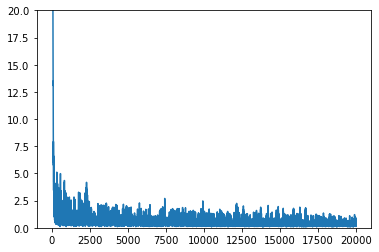

In [74]:
graph = pd.read_csv('./27case_ANNmodels_kfold/BestModel_M1_Fold1_history.csv', sep = ",")
plt.plot(graph.iloc[:,2])
plt.ylim(0,20)

(0.0, 20.0)

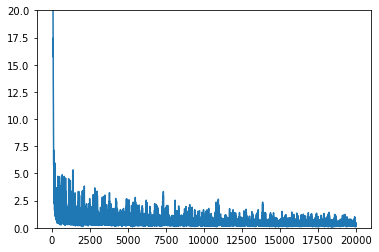

In [75]:
graph = pd.read_csv('./27case_ANNmodels_kfold/BestModel_M1_Fold3_history.csv', sep = ",")
plt.plot(graph.iloc[:,2])
plt.ylim(0,20)

Text(0, 0.5, 'mape (%)')

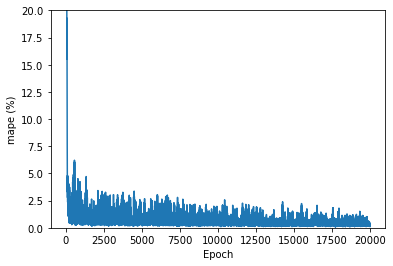

In [52]:
plt.plot(BestModel_temp.history['mape'])
plt.ylim(0,20)
plt.xlabel('Epoch')
plt.ylabel('mape (%)')

In [54]:
for F in range(Fold):
    s = "Model_Fold%d = keras.models.load_model('./27case_ANNmodels_kfold/BestModel_M1_Fold%d.h5')"%(F+1,F+1)
    exec(s)
    

In [55]:
Model_Fold1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                200       
                                                                 
 dense_1 (Dense)             (None, 70)                3570      
                                                                 
 dense_2 (Dense)             (None, 80)                5680      
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total params: 9,531
Trainable params: 9,531
Non-trainable params: 0
_________________________________________________________________


In [56]:
for i in range (Fold):
    s1 = "real2 = ValidLabel_Fold%d"%(i+1)
    exec(s1)
    real3 = real2.sub(0.5)
    real4 = real3.mul(max_VS - min_VS)
    real = real4 + min_VS
    
    s2 = "predict2 = Model_Fold%d.predict(ValidData_Fold%d)"%(i+1,i+1)
    exec(s2)
    predict2 = pd.DataFrame(predict2)
    predict3 = predict2.sub(0.5)
    predict4 = predict3.mul(max_VS - min_VS)
    predict = predict4 + min_VS
    
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(i+1)
    exec(s3)

1/1 [==============================] - 0s 53ms/step


In [57]:
for i in range(Fold):
    a1 = 'Error%d = pd.DataFrame(((Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1])/Result_Fold%d.iloc[:,0])*100)'%(i+1,i+1,i+1,i+1)
    exec(a1)
    a2 = 'absError%d = np.abs(Error%d)'%(i+1,i+1)
    exec(a2)
    a3 = 'Result%d = pd.DataFrame(np.concatenate((Result_Fold%d,Error%d,absError%d),axis = 1))'%(i+1,i+1,i+1,i+1)
    exec(a3)
    
Result_total = pd.concat([Result1,Result2,Result3,Result4,Result5])
Result_total.columns = ['Real', 'Predict', 'Error' , 'absError']
pd.set_option('display.max_rows', None)
Result_total.reset_index(drop=True)

,Real,Predict,Error,absError
0,7.805868,8.868258,-13.610139,13.610139
1,12.367308,14.017777,-13.345422,13.345422
2,18.029634,17.805134,1.245173,1.245173
3,2.933022,1.280447,56.343760,56.343760
4,4.840932,3.567870,26.297862,26.297862
5,7.411128,9.589552,-29.393959,29.393959
6,-0.852096,0.065904,107.734298,107.734298
7,-0.558234,0.465700,183.423712,183.423712
8,-0.216126,1.764127,916.249215,916.249215
9,7.485690,7.682308,-2.626581,2.626581


In [58]:
print("Average Error : ", np.mean(Result_total.iloc[:,3]))

Average Error :  665.1898112323495


In [59]:
print("Average Error : ", np.mean(Result1.iloc[:,3]))

Average Error :  22.16847135418168


In [60]:
print("Average Error : ", np.mean(Result2.iloc[:,3]))

Average Error :  247.88555286480005


In [61]:
print("Average Error : ", np.mean(Result3.iloc[:,3]))

Average Error :  19.02477807873698


In [62]:
print("Average Error : ", np.mean(Result4.iloc[:,3]))

Average Error :  3021.303557260814


In [63]:
print("Average Error : ", np.mean(Result5.iloc[:,3]))

Average Error :  15.566696603213789


In [64]:
a = 100 - 6.8180420596193505
a

93.18195794038066

# 전체 학습 후 train data로 검증

In [65]:
TrainData = inputdataRaw.iloc[:,:-2]

TrainLabel = pd.DataFrame(inputdataRaw.iloc[:,3])
TrainData

,Mold Temperature,Melt Temperature,Packing Pressure,VS,VMS
0,30,195,50,2.238,0.001106
1,30,195,70,3.278,0.001952
2,30,195,90,4.569,0.002951
3,30,210,50,1.127,0.000467
4,30,210,70,1.562,0.000762
5,30,210,90,2.148,0.001119
6,30,225,50,0.264,0.000172
7,30,225,70,0.331,0.000197
8,30,225,90,0.409,0.000228
9,40,195,50,2.165,0.001185


In [66]:
TrainLabel

,VS
0,2.238
1,3.278
2,4.569
3,1.127
4,1.562
5,2.148
6,0.264
7,0.331
8,0.409
9,2.165


In [67]:
# TrainLabel = TrainLabel_before.add(0.5)
# TrainLabel

In [68]:
for M in range(1):
    Tr_result_temp = pd.read_csv('./27case_ANN_prediction/Tr_result_epoch2000.csv', sep=',')
    learningRate   = Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,1]
    noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,2])
    noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,3])
    Epoch          = 10000

    print('\n\n\nPrediction :' + Model[M])
    print('Learning rate : {:.3}'.format(learningRate))
    print('Hidden 1 neuron : %d'%(noOfNeuron1))
    print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

    tf.keras.backend.clear_session()
    def ANN_model(input_data):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units = noOfNeuron_in, 
                                     input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
        model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
        model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
        model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
        model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                      loss=keras.losses.mean_absolute_error,
                      metrics=['mse','mae','mape'])
        return model
    model = ANN_model(TrainData)

        ################ 신경망 학습 ################

    BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
    print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
          .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))
            
            
            
        # 모델 저장
    model.save('./27case_ANNmodels_AllData/BestModel_M%d.h5'%(M+1))

        # 히스토리 저장
    RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
    MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
    MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

    History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
    History_temp.to_csv("./27case_ANNmodels_AllData/BestModel_M%d_history.csv"%(M+1), index=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8036\3858350740.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAPE'],ascending=True).iloc[0,2])
C:\Users\user\AppData\Local\Temp\ipykernel_8036\3858350740.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to 




Prediction :VS
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 80
[0 Epochs]    RMSE:19.11935,   MAE: 18.95445,  MAPE: 3039.18%
[100 Epochs]    RMSE:0.93794,   MAE: 0.74371,  MAPE: 80.71%
[200 Epochs]    RMSE:1.62638,   MAE: 1.59891,  MAPE: 223.12%
[300 Epochs]    RMSE:0.90613,   MAE: 0.87298,  MAPE: 114.71%
[400 Epochs]    RMSE:0.29854,   MAE: 0.26534,  MAPE: 50.21%
[500 Epochs]    RMSE:0.22359,   MAE: 0.18303,  MAPE: 18.96%
[600 Epochs]    RMSE:0.17681,   MAE: 0.14697,  MAPE: 27.56%
[700 Epochs]    RMSE:1.49226,   MAE: 1.48823,  MAPE: 225.50%
[800 Epochs]    RMSE:0.22787,   MAE: 0.19414,  MAPE: 38.30%
[900 Epochs]    RMSE:0.39614,   MAE: 0.35524,  MAPE: 61.31%
[1000 Epochs]    RMSE:0.71458,   MAE: 0.70763,  MAPE: 101.82%
[1100 Epochs]    RMSE:0.22078,   MAE: 0.19536,  MAPE: 34.03%
[1200 Epochs]    RMSE:0.98558,   MAE: 0.96790,  MAPE: 162.21%
[1300 Epochs]    RMSE:0.83668,   MAE: 0.81146,  MAPE: 133.11%
[1400 Epochs]    RMSE:0.49434,   MAE: 0.46875,  MAPE: 83.02%
[1500

(0.0, 20.0)

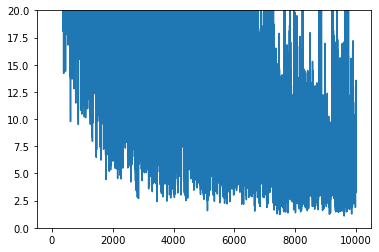

In [69]:
graph = pd.read_csv('./27case_ANNmodels_AllData/BestModel_M1_history.csv', sep = ",")
plt.plot(graph.iloc[:,2])
plt.ylim(0,20)

In [70]:
Model_test = keras.models.load_model('./27case_ANNmodels_AllData/BestModel_M1.h5')

In [71]:
real = TestLabel
predict2 = Model_test.predict(TestData)
predict3 = pd.DataFrame(predict2)
predict4 = predict3.sub(0.5)
predict5 = predict4.mul(max_VS - min_VS)
predict = predict5 + min_VS
Result_test = pd.DataFrame(np.concatenate((real,predict), axis = 1))

ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 3)


In [72]:
Error = pd.DataFrame(((Result_test.iloc[:,0]-Result_test.iloc[:,1])/Result_test.iloc[:,0])*100)
absError = np.abs(Error)
Result = pd.DataFrame(np.concatenate((Result_test,Error,absError), axis=1))

Result.columns = ['Real', 'Predict', 'Error' , 'absError']
pd.set_option('display.max_rows', None)
Result

NameError: name 'Result_test' is not defined

In [73]:
print("Average Error : ", np.mean(Result.iloc[:,3]))

NameError: name 'Result' is not defined

In [ ]:
b = 100 - 0.2505445699074594
b